<a href="https://colab.research.google.com/github/JaureguiJo/CinetecaNacional-DataAnalysis/blob/main/CinetecaDataAnalysis_JaureguiJo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE DATOS CINETECA NACIONAL MÉXICO


Para este proyecto decidí enfocarme en la categoría Journal Oriented y el objetivo es analizar los datos abiertos de la Cineteca Nacional de México

[Titulos proyectados con asistencia](https://datos.gob.mx/busca/dataset/titulos-proyectado-con-asistencia)

Importar librerias

In [96]:
import pandas as pd
print("Pandas version:", pd.__version__)

Pandas version: 2.2.2


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract - ¿Qué Datos tenemos?

Para mi análisis era fundamental trabajar con un enfoque eficiente y estructurado para extraer, transformar y cargar los datos relevantes. Después de evaluar las diferentes opciones/modelos que aprendimos durante el curso, decidí utilizar el modelo ETL (Extract, Transform, Load) como base para mi análisis. Comencemos.

In [98]:
df = pd.read_csv('./FCN-DA-19-DDP-TPA (1).csv', encoding='latin-1') # Leer los datos
df.head() # Leer las primeras 5 columnas

,titulo_pelicula,director,ciclo,pais,asistencia,funciones,genero,anio_exhibicion,mes_exhibicion,lugar_exhibicion
0,31 Festival,VARIOS,FETIVAL,"España, México",174,1,ADULTOS,2019,ENERO,Sala
1,Acusada,Gonzalo Tobal,CC,"Argentina, México",3601,27,ADULTOS,2019,ENERO,Sala
2,Agonía de Amor,Alfred Hitchcock,Ciclo Hitchcock,Estados Unidos,91,1,ADULTOS,2019,ENERO,Sala
3,Al tercer tiro,Alfred Hitchcock,Ciclo Hitchcock,Estados Unidos,103,1,ADULTOS,2019,ENERO,Sala
4,Alanis,Anahí Berneri,CC,Argentina,4254,46,ADULTOS,2019,ENERO,Sala


In [99]:
df.tail() # Muestra los ultimos 'n' elementos

,titulo_pelicula,director,ciclo,pais,asistencia,funciones,genero,anio_exhibicion,mes_exhibicion,lugar_exhibicion
7803,100 AÑOS DE RADIO EDUCACIÓN,(@aprende.mx,Cínica. Festival de Cine de Música de México,México,81,1,Adultos,2024,Noviembre,Foro Gratis
7804,LA PELÍCULA,Max Del Río,Cínica. Festival de Cine de Música de México,México,45,1,Adultos,2024,Noviembre,Foro Gratis
7805,MARINO Y LOS AUTÉNTICOS,Cristóbal Jasso,Cínica. Festival de Cine de Música de México,México,29,1,Adultos,2024,Noviembre,Foro Gratis
7806,HOMENAJE 40 AÑOS DE LA CINETECA NACIONAL EN XO...,Varios,Cínica. Festival de Cine de Música de México,México,80,1,Adultos,2024,Noviembre,Foro Gratis
7807,VÍKINGUR ÓLAFSSON: \nDESDE AFAR,NaN,MÚSICA CLÁSICA EN LA CINETECA,NaN,80,1,Adultos,2024,Noviembre,Foro Gratis


In [100]:
df.shape # Numero de Filas o columnas.

(7808, 10)

In [101]:
df.dtypes # Tipos de Datos

,0
titulo_pelicula,object
director,object
ciclo,object
pais,object
asistencia,object
funciones,object
genero,object
anio_exhibicion,int64
mes_exhibicion,object
lugar_exhibicion,object


In [102]:
df.count() # Cuenta el numero de valores no nulos en cada columna

,0
titulo_pelicula,7808
director,7723
ciclo,7804
pais,7685
asistencia,7808
funciones,7808
genero,7808
anio_exhibicion,7808
mes_exhibicion,7808
lugar_exhibicion,7806


In [103]:
len(df) # Numero de filas

7808

In [104]:
print(df.isnull().sum()) # Cuenta el numero de valores nulos en cada columna

titulo_pelicula       0
director             85
ciclo                 4
pais                123
asistencia            0
funciones             0
genero                0
anio_exhibicion       0
mes_exhibicion        0
lugar_exhibicion      2
dtype: int64


# Limpieza de datos y Transformacion


In [105]:
df.info() # Informacion del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titulo_pelicula   7808 non-null   object
 1   director          7723 non-null   object
 2   ciclo             7804 non-null   object
 3   pais              7685 non-null   object
 4   asistencia        7808 non-null   object
 5   funciones         7808 non-null   object
 6   genero            7808 non-null   object
 7   anio_exhibicion   7808 non-null   int64 
 8   mes_exhibicion    7808 non-null   object
 9   lugar_exhibicion  7806 non-null   object
dtypes: int64(1), object(9)
memory usage: 610.1+ KB


In [106]:
df.drop_duplicates(inplace=True) # Eliminar Duplicados

In [107]:
len(df)

7807

# Transformar y limpiar la columna funciones

*Esta columna es el número de funciones que hubo por película.*

In [108]:
df['funciones'].unique() # Muestra los valores unicos de una columna

array(['1', '27', '46', '3', '29', '6', '28', '2', '11', '43', '13', '24',
       '40', '60', '7', '9', '19', '67', '34', '15', '14', '22', '32',
       '18', '25', '8', '31', '44', '83', '10', '49', '12', '50', '33',
       '4', '37', '30', '38', '36', '23', '41', '53', '21', '17', '51',
       '16', '42', '45', '39', '20', '5', '54', '35', '0', '47', '48',
       '26', 's/f', '52', '72', '76', '55', '66', '95', '61', '62', 'S/F',
       '58', '63', '77', '57', '65', '56', 's/n', '75', '59', '73',
       'S /F', '119', '113', '107', '104', '114', '110', '85', '157',
       '64', '84', '91', '126', '120', '112', '92', '165', '68', '131',
       '138', '103', '100', '111', '80', '97', '137', '69', '125', '90',
       '108', '78', '124', '96', '82', '79', '86', '127', '134', '130',
       '98', 'cancelada', '89', '106', '70', '102', '71'], dtype=object)

In [109]:
to_replace = ['cancelada','S /F','S/F','s/n','s/f']
replace_with = '0'
df['funciones'] = df['funciones'].replace(to_replace, replace_with) # Reemplaza valores en una columna
df['funciones'].unique() # Muestra los valores unicos de una columna

array(['1', '27', '46', '3', '29', '6', '28', '2', '11', '43', '13', '24',
       '40', '60', '7', '9', '19', '67', '34', '15', '14', '22', '32',
       '18', '25', '8', '31', '44', '83', '10', '49', '12', '50', '33',
       '4', '37', '30', '38', '36', '23', '41', '53', '21', '17', '51',
       '16', '42', '45', '39', '20', '5', '54', '35', '0', '47', '48',
       '26', '52', '72', '76', '55', '66', '95', '61', '62', '58', '63',
       '77', '57', '65', '56', '75', '59', '73', '119', '113', '107',
       '104', '114', '110', '85', '157', '64', '84', '91', '126', '120',
       '112', '92', '165', '68', '131', '138', '103', '100', '111', '80',
       '97', '137', '69', '125', '90', '108', '78', '124', '96', '82',
       '79', '86', '127', '134', '130', '98', '89', '106', '70', '102',
       '71'], dtype=object)

In [110]:
df['funciones'] = df['funciones'].astype(int) # Convierte una columna a un tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7807 entries, 0 to 7807
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titulo_pelicula   7807 non-null   object
 1   director          7722 non-null   object
 2   ciclo             7803 non-null   object
 3   pais              7684 non-null   object
 4   asistencia        7807 non-null   object
 5   funciones         7807 non-null   int64 
 6   genero            7807 non-null   object
 7   anio_exhibicion   7807 non-null   int64 
 8   mes_exhibicion    7807 non-null   object
 9   lugar_exhibicion  7805 non-null   object
dtypes: int64(2), object(8)
memory usage: 670.9+ KB


# Transformar y limpiar la columna asistencia

*Esta columna es el número de asistentes por función*

In [111]:
df['asistencia'].unique() # Muestra los valores unicos de una columna

array(['174', '3601', '91', ..., '675', '656', '1610'], dtype=object)

In [112]:
to_replace = ['\D+'] # Regex que significa No Digit
replace_with = '0' # Reemplaza valores en una columna
df['asistencia'] = df['asistencia'].astype(str).replace(to_replace, replace_with, regex=True) # Reemplaza valores en una columna
df['asistencia'].unique() # Muestra los valores unicos de una columna

array(['174', '3601', '91', ..., '675', '656', '1610'], dtype=object)

In [113]:
df.groupby('asistencia').count() # Agrupa los datos por una columna

,titulo_pelicula,director,ciclo,pais,funciones,genero,anio_exhibicion,mes_exhibicion,lugar_exhibicion
asistencia,,,,,,,,,
0,66,65,66,65,66,66,66,66,66
1,7,7,7,6,7,7,7,7,7
10,14,14,14,13,14,14,14,14,14
100,36,36,36,36,36,36,36,36,36
1000,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
995,2,2,2,2,2,2,2,2,2
9958,1,1,1,1,1,1,1,1,1
996,1,1,1,1,1,1,1,1,1


In [114]:
df['asistencia'] = df['asistencia'].astype(int) # Convierte una columna a un tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7807 entries, 0 to 7807
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titulo_pelicula   7807 non-null   object
 1   director          7722 non-null   object
 2   ciclo             7803 non-null   object
 3   pais              7684 non-null   object
 4   asistencia        7807 non-null   int64 
 5   funciones         7807 non-null   int64 
 6   genero            7807 non-null   object
 7   anio_exhibicion   7807 non-null   int64 
 8   mes_exhibicion    7807 non-null   object
 9   lugar_exhibicion  7805 non-null   object
dtypes: int64(3), object(7)
memory usage: 670.9+ KB


# Llenar los campos nulos

In [115]:
df['pais'] = df['pais'].fillna('N/A')
df['director'] = df['director'].fillna('N/A')
df['ciclo'] = df['ciclo'].fillna('N/A')
df['lugar_exhibicion'] = df['lugar_exhibicion'].fillna('N/A')

In [116]:
print(df.isnull().sum()) # Cuenta el numero de valores nulos en cada columna

titulo_pelicula     0
director            0
ciclo               0
pais                0
asistencia          0
funciones           0
genero              0
anio_exhibicion     0
mes_exhibicion      0
lugar_exhibicion    0
dtype: int64


# Transform y limpiar la columna país

*Países que participaron en la producción de la película.*

In [117]:
df.groupby('pais').count() # Agrupa los datos por una columna

,titulo_pelicula,director,ciclo,asistencia,funciones,genero,anio_exhibicion,mes_exhibicion,lugar_exhibicion
pais,,,,,,,,,
Alemania,6,6,6,6,6,6,6,6,6
"Alemania, Islandia, México, Estados Unidos",4,4,4,4,4,4,4,4,4
Argentina,7,7,7,7,7,7,7,7,7
"Argentina, Chile, México",1,1,1,1,1,1,1,1,1
"Argentina, Francia",3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
letonia,1,1,1,1,1,1,1,1,1
"república de Kirguistan, Francia, suiza, Irán, Paises Bajos, México, Argentina, Italia",1,1,1,1,1,1,1,1,1
"stados Unidos, Reino Unido",2,2,2,2,2,2,2,2,2


In [118]:
# Función para convertir a minusculas
def texto_minusculas(texto):
    texto = texto.lower()
    return texto

In [119]:
# Aplicar la función de minusculas y sustituir valores
df['pais'] = df['pais'].apply(texto_minusculas)
df['pais'] = df['pais'].str.replace('-', ',').str.replace('/', ',').str.replace('&', ',').str.replace(" ", "")
df['pais'] = df['pais'].str.strip() # Eliminar espacios al inicio y al final de la cadena
df['pais'].unique()

array(['españa,méxico', 'argentina,méxico', 'estadosunidos', ...,
       'uruguay,', 'méxico,japón,españa,estadosunidos,francia,',
       'méxico,china,taiwan,colombia,estadosunidos,polonia,españa'],
      dtype=object)

# Transform y limpiar la columna mes_exhibicion

In [120]:
df['mes_exhibicion'].unique() # Muestra los valores unicos de una columna

array(['ENERO ', 'FEBRERO', 'MARZO', 'ABRIL', 'Mayo', 'JUNIO', 'Julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre',
       'Enero', 'Febrero', 'Marzo', 'Agosto', 'Septiembre ', 'Octubre',
       'Noviembre', 'Diciembre', 'Abril', 'Junio', 'julio ', 'Marzo ',
       'Septiembre', 'Enero ', 'Febrero ', 'Agosto '], dtype=object)

In [121]:
df['mes_exhibicion'] = df['mes_exhibicion'].str.upper()
df['mes_exhibicion'] = df['mes_exhibicion'].str.strip()
df['mes_exhibicion'].unique() # Muestra los valores unicos de una columna

array(['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype=object)

# Transformar y limpiar la columna titulo_pelicula

In [122]:
# Crear una copia para evitar modificar el DataFrame original directamente
df_cleaned = df.copy()

# Funcion para limpiar los campos de titulo_pelicula
def clean_title(title):
    """
    limpia los titulos de peliculas eliminando los substrings de los titulos que terminan en "sub" o "dob".
    """
    title = str(title)  # Convierte el campo a string para evitar errores de tipo
    if title.lower().endswith("sub"):
        title = title[:-3].strip()  # Elimina "sub" y algunos espacios en blanco
    elif title.lower().endswith("dob"):
        title = title[:-3].strip() # Elimina "dob" y algunos espacios en blanco
    return title


# Aplica la funcion
df_cleaned["titulo_pelicula"] = df_cleaned["titulo_pelicula"].apply(clean_title)

# Muestra los primeros campos
print(df_cleaned.head())

# remplaza el DataFrame original con el limpio
df = df_cleaned

   titulo_pelicula           director            ciclo              pais  \
0      31 Festival             VARIOS          FETIVAL     españa,méxico   
1          Acusada      Gonzalo Tobal               CC  argentina,méxico   
2   Agonía de Amor  Alfred Hitchcock   Ciclo Hitchcock     estadosunidos   
3  Al tercer tiro   Alfred Hitchcock   Ciclo Hitchcock     estadosunidos   
4           Alanis     Anahí Berneri                CC         argentina   

   asistencia  funciones    genero  anio_exhibicion mes_exhibicion  \
0         174          1   ADULTOS             2019          ENERO   
1        3601         27  ADULTOS              2019          ENERO   
2          91          1   ADULTOS             2019          ENERO   
3         103          1   ADULTOS             2019          ENERO   
4        4254         46  ADULTOS              2019          ENERO   

  lugar_exhibicion  
0             Sala  
1             Sala  
2             Sala  
3             Sala  
4             Sal

In [123]:
df['titulo_pelicula'] = df['titulo_pelicula'].str.strip()

# Transformar y limpiar la columna ciclo

In [124]:
df['ciclo'] = df['ciclo'].apply(texto_minusculas) # Aplicar la función de minusculas
df['ciclo'] = df['ciclo'].str.strip() # Eliminar espacios al inicio y al final de la cadena
to_replace = ["estrenos", "mic 68", "66 mic"]
value = ["estreno", "68 muestra internacional de cine", "66 muestra internacional de cine"]
df['ciclo'] = df['ciclo'].replace(to_replace, value)
df['ciclo'].unique()

array(['fetival', 'cc', 'ciclo hitchcock', 'cine portugués',
       'retrospectiva ripstein', 'estreno', 'cine judio',
       'clásicos en pantalla', 'cine y literatura',
       'conversando cineastas', 'matinée de reyes',
       'matinée de reyes / matinée infantil', 'premier', 'conferencia',
       'clásicos del cine mexicano', 'cineclub 43',
       'festival internacional de cine judío', 'matineé infantil',
       'clásicos de la época dorada en hollywood',
       'cine y danza independiente de buenos aires', 'muestra ccc',
       'retrospectiva alfonso cuarón', 'presentación de libro',
       'seminario', 'funición privada', 'cine club 43',
       'noches de shorts', 'presentación de revista',
       'seminario el público del futuro ficunam',
       'ficunam retrospectiva alan clarke',
       'ficunam retrospectiva ulrich köhler', 'ficunam',
       'ficunam retrospectiva pere portabella', 'función especial',
       'seminario de experiencia de archivo', 'función privada', 'cortos',

# Transform y limpiar la columna lugar_exhibicion

In [125]:
df['lugar_exhibicion'].unique() # Muestra los valores unicos de una columna

array(['Sala', 'FORO ', 'FORO', 'SALA', 'sala', 'Foro', 'Galería',
       'Sala / Virtual', 'Virtual', 'Sala/Virtual', ' Sala / Virtual',
       'Virtual / Foro', 'Sala /Foro', 'Sala / Foro', 'Sala ',
       'Sala / Virtual / Foro', 'Sala / Foro ', 'Sala/ Virtual ',
       'Foro Gratis ', 'Foro Gratis', 'Sala Virtual',
       'Sala / Sala Virtual', 'Sala Virtual ', 'Sala virtual',
       'Sala, Sala Virtual, Foro ', 'Sala Virtual  / Foro',
       'Sala / Sala Virtual ', 'Foro ', 'Foro / Sala Vitual ',
       'FORO GRATIS ', 'SALA/FORO', 'SALA / FORO', 'FORO GRATIS',
       'Foro Al Aire Libre', 'Foro al Aire Libre',
       'Sala/Foro al aire libre', 'Foro al aire libre',
       'Sala / Foro al aire libre', 'foro gratis ', 'Sala/Foro', 'sala ',
       'N/A'], dtype=object)

In [126]:
def clean_lugar_exhibicion(lugar):
    lugar = str(lugar).lower().strip()
    if 'sala' in lugar or 'virtual' in lugar or 'foro' in lugar:
      if 'foro' in lugar and 'sala' in lugar and 'virtual' in lugar:
        return 'Sala/Foro/Virtual'
      elif 'foro' in lugar and 'sala' in lugar:
        return 'Sala/Foro'
      elif 'sala' in lugar and 'virtual' in lugar:
        return 'Sala/Virtual'
      elif 'foro' in lugar and 'virtual' in lugar:
        return 'Foro/Virtual'
      elif 'foro' in lugar:
        return 'Foro'
      elif 'sala' in lugar:
        return 'Sala'
      elif 'virtual' in lugar:
        return 'Virtual'
    elif 'galería' in lugar:
        return 'Galería'
    elif "aire libre" in lugar:
        return "Foro al aire libre"
    else:
        return lugar

# Aplicar la funcion de limpieza
df['lugar_exhibicion'] = df['lugar_exhibicion'].apply(clean_lugar_exhibicion)

# Mostrar los valores unicos despues de la limpieza
print(df['lugar_exhibicion'].unique())

['Sala' 'Foro' 'Galería' 'Sala/Virtual' 'Virtual' 'Foro/Virtual'
 'Sala/Foro' 'Sala/Foro/Virtual' 'n/a']


# Load - Cargar la informacion

In [127]:
df.to_csv('cineteca_clean_data.csv', index=False)

# VISUALIZACION DE LOS DATOS

**¿Qué meses asistió más gente al Cine?**


In [128]:
df_agg = df.groupby('mes_exhibicion').agg({'asistencia': 'sum'}).reset_index()
df_agg

,mes_exhibicion,asistencia
0,ABRIL,391419
1,AGOSTO,390065
2,DICIEMBRE,335640
3,ENERO,476892
4,FEBRERO,452218
5,JULIO,398129
6,JUNIO,334663
7,MARZO,449062
8,MAYO,344324
9,NOVIEMBRE,386150


In [129]:
# Ordenar los meses en español del dataframe y que el index siga en orden

meses_esp = {
    'ENERO': '01',
    'FEBRERO': '02',
    'MARZO': '03',
    'ABRIL': '04',
    'MAYO': '05',
    'JUNIO': '06',
    'JULIO': '07',
    'AGOSTO': '08',
    'SEPTIEMBRE': '09',
    'OCTUBRE': '10',
    'NOVIEMBRE': '11',
    'DICIEMBRE': '12'
}

# Crea una columna nueva con los numeros de meses ordenados
df_agg['mes_num'] = df_agg['mes_exhibicion'].map(meses_esp)

# Convierte la columna a tipo numerico
df_agg['mes_num'] = pd.to_numeric(df_agg['mes_num'])

# Ordena el DataFrame en base al numero de mes
df_agg = df_agg.sort_values(by='mes_num')

# Resetea el index para mantener el orden
df_agg = df_agg.reset_index(drop=True)

# Remove la columna temporal
df_agg = df_agg.drop(columns=['mes_num'])

df_agg

,mes_exhibicion,asistencia
0,ENERO,476892
1,FEBRERO,452218
2,MARZO,449062
3,ABRIL,391419
4,MAYO,344324
5,JUNIO,334663
6,JULIO,398129
7,AGOSTO,390065
8,SEPTIEMBRE,345897
9,OCTUBRE,359239


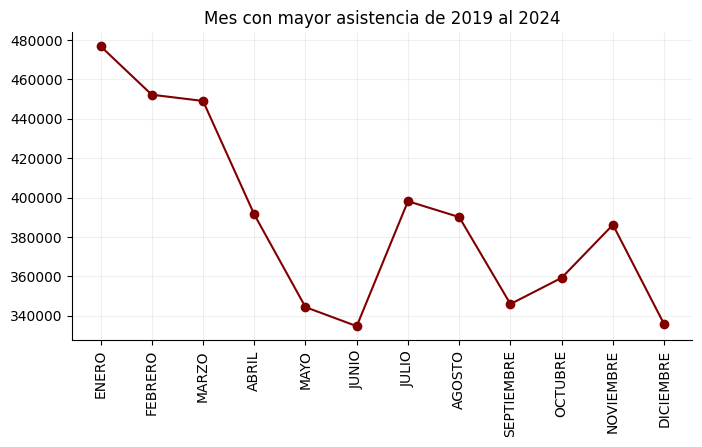

In [130]:
from matplotlib import pyplot as plt
x_ticks_positions = range(len(df_agg['mes_exhibicion']))
df_agg['asistencia'].plot(marker='o', kind='line', figsize=(8, 4), color='maroon', title='Mes con mayor asistencia de 2019 al 2024')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(x_ticks_positions, df_agg['mes_exhibicion'])
plt.xticks(rotation=90)
plt.grid(True, alpha=0.2)  # Activa la cuadrícula, es lo mismo que plt.grid()
plt.show()

**Películas con más asistentes de 2019 a 2024**

In [131]:
df_ag = df.groupby('titulo_pelicula').agg({'asistencia': 'sum', 'director': 'first'}).reset_index()
df_ag = df_ag.sort_values(by='asistencia', ascending=False)
df_ag.head(10)

,titulo_pelicula,asistencia,director
3948,Pinocho de Guillermo del Toro,92805,Guillermo del Toro y Mark Gustafso
3428,Mi amigo el robot,60013,Pablo Berger
1150,Dolor y Gloria,41175,Pedro Almodóvar
1196,Días perfectos,35514,Wim Wenders
4291,Roma,35112,Alfonso Cuarón
3964,Pobres Criaturas,34417,Yorgos Lanthimos
859,Climax,33994,Gaspar Noe
2609,La ballena,33950,Darren Aronofsky
1643,El niño y la garza,33472,Hayao Miyazaki
2854,La sustancia,31961,Coralie Fargeat


**Películas solo mexicanas con mayor asistencia 2019 a 2024**

In [132]:
# Filtra las peliculas donde Mexico esta listado como pais participante
mexico_movies = df[df['pais'].str.contains('méxico', na=False)]

# agrupa los datos por el titulo de pelicula y suma a los asistentes
mexico_movies_attendance = mexico_movies.groupby('titulo_pelicula').agg({'asistencia': 'sum', 'director': 'first'}).reset_index()

# ordena la asistencia en orden descendente
top_10_mexico_movies = mexico_movies_attendance.sort_values('asistencia', ascending=False).head(10)

# Muestra los resultados
top_10_mexico_movies

,titulo_pelicula,asistencia,director
1364,Roma,35112,Alfonso Cuarón
214,Chicuarotes,31732,Gael García Bernal
873,Las niñas bien,20675,Alejandra Márquez Abella
447,ESTO NO ES BERLÍN,20520,Hari Sama
532,El secreto del Doctor Grinberg,18893,Ida Cuéllar
107,"Bardo, falsa crónica de unas cuantas verdades",18548,Alejandro G. Iñárritu
1634,Tótem,16475,Lila Avilés
777,La Camarista,16407,Liliana
805,La civil,11367,Teodora Ana Mihai
644,Heroico,11044,David Zonana


**Porcentaje de películas mexicanas exhibidas vs internacionales desde 2019 a 2024**

In [133]:
# Calcula el porcentaje de peliculas donde Mexico participa vs. otras ciudades
mexico_movies = df[df['pais'].str.contains("méxico", na=False)]
total_movies = len(df)
mexico_percentage = (len(mexico_movies) / total_movies) * 100

other_countries_percentage = 100 - mexico_percentage

print(f"Porcentaje de peliculas donde Mexico participa: {mexico_percentage:.2f}%")
print(f"Porcentaje de pelicula internacionales: {other_countries_percentage:.2f}%")

Porcentaje de peliculas donde Mexico participa: 31.41%
Porcentaje de pelicula internacionales: 68.59%


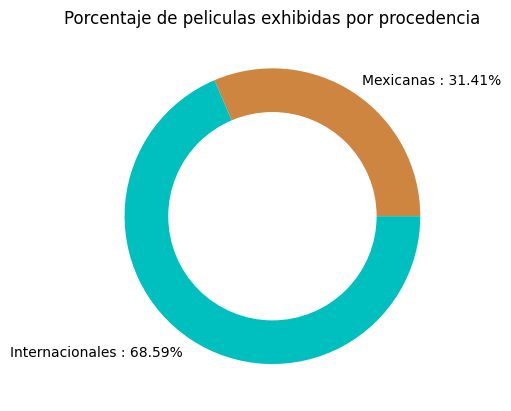

In [134]:
import matplotlib.pyplot as plt

# Crea la data
names = [f"Mexicanas : {mexico_percentage:.2f}%", f"Internacionales : {other_countries_percentage:.2f}%"]
size=[mexico_percentage,other_countries_percentage]

# Crea una grafica de dona
my_circle = plt.Circle( (0,0), 0.7, color='white')

# nombre de los colores
plt.pie(size, labels=names, colors=['peru','c'])
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Porcentaje de peliculas exhibidas por procedencia') # Agrega el titulos

plt.show()

**Porcentaje de películas exhibidas en cada lugar de exhibición**

In [135]:
# Calcula el pordentaje de exhibiciones por sala
lugar_exhibicion_counts = df['lugar_exhibicion'].value_counts(normalize=True) * 100
lugar_exhibicion_percentages = lugar_exhibicion_counts.to_dict()
#Se convierte a diccionario ya que es necesario para la grafica de Waffle

lugar_exhibicion_percentages

{'Sala': 86.70423978480851,
 'Foro': 10.195977968489817,
 'Sala/Virtual': 1.4602280005123607,
 'Virtual': 1.1143845267068015,
 'Sala/Foro': 0.4098885615473293,
 'Sala/Foro/Virtual': 0.05123607019341616,
 'Galería': 0.02561803509670808,
 'n/a': 0.02561803509670808,
 'Foro/Virtual': 0.01280901754835404}

In [136]:
!pip install pywaffle

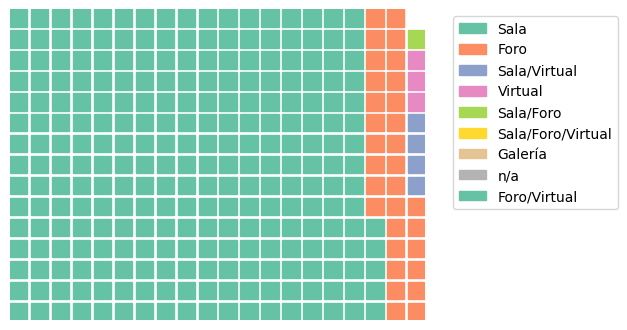

In [137]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Se asignan los valores que seran mostrados en la grafica
data = lugar_exhibicion_percentages

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=15,
  columns=20,
  values=data,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

**Festivales por año**

In [138]:
# Agrupa los ciclos por fecha de exhibicion y suma 'asistencia'
# Excluye los 'ciclo' como 'cc' o 'estreno'
ciclos_asistencia = df[~df['ciclo'].isin(['cc', 'estreno'])].groupby(['anio_exhibicion', 'ciclo'])['asistencia'].sum().reset_index()

# Ordena los valores
ciclos_asistencia_sorted = ciclos_asistencia.sort_values(['anio_exhibicion', 'asistencia'], ascending=[True, False])

# Obtiene los dos ciclos con mayor asistencia por fecha
top_two_cycles = ciclos_asistencia_sorted.groupby('anio_exhibicion').head(2)

top_two_cycles

,anio_exhibicion,ciclo,asistencia
7,2019,66 muestra internacional de cine,32720
8,2019,67 muestra internacional de cine,26477
184,2020,clásicos en pantalla grande,8623
178,2020,68 muestra internacional de cine,7887
241,2021,70 muestra internacional de cine,11661
240,2021,69 muestra internacional de cine,10874
313,2022,71 muestra internacional de cine,12535
315,2022,72 muestra internacional de cine,11635
406,2023,73 muestra internacional de cine,19516
446,2023,funciones especiales,14828


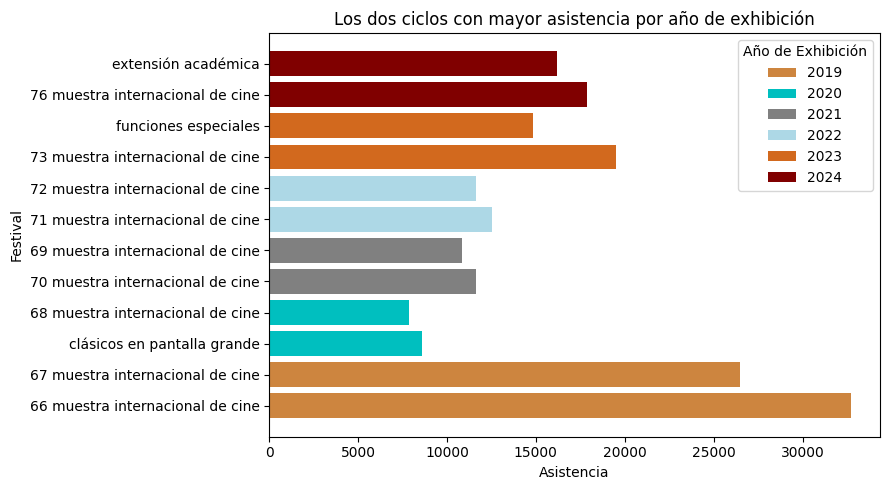

In [139]:
import matplotlib.pyplot as plt

# Crea una grafica horizontal de barras
color = ['peru', 'c', 'gray', 'lightblue', 'chocolate', 'maroon']
index = 0
plt.figure(figsize=(9, 5))  # Ajusta el tamanio de la figura
for anio in top_two_cycles['anio_exhibicion'].unique():
    anio_data = top_two_cycles[top_two_cycles['anio_exhibicion'] == anio]
    plt.barh(anio_data['ciclo'], anio_data['asistencia'], label=str(anio), color=color[index % len(color)])
    index += 1

plt.xlabel('Asistencia')
plt.ylabel('Festival')
plt.title('Los dos ciclos con mayor asistencia por año de exhibición')
plt.legend(title='Año de Exhibición')
plt.tight_layout()
plt.show()

**Todos los Festivales en 2024**

In [140]:
# Filtra por el anio 2024
df_2024 = df[df['anio_exhibicion'] == 2024]
#Selecciona los ciclos con mayor numero de funciones omitiendo cc y estreno, ya que no se consideran festivales.
ciclos_2024 = df_2024[~df_2024['ciclo'].isin(['cc', 'estreno', 'estrenos / funciones especiales'])].groupby('ciclo')['funciones'].sum().reset_index()

top_10_ciclos_2024 = ciclos_2024.sort_values('funciones', ascending=False).head(10)

top_10_ciclos_2024

,ciclo,funciones
22,extensión académica,198
2,43 foro internacional de cine,168
4,75 muestra internacional de cine,168
5,76 muestra internacional de cine,168
69,talento emergente 2024,150
31,funciones especiales,85
61,retrospectiva lars von trier,75
42,matiné infantil 2024,64
59,retrospectiva akira kurosawa,55
29,ficunam 2024,46


**Países con más participación en películas de estreno proyectadas en la Cineteca Nacional**

In [141]:
def estreno_por_pais(df):
    #Se crea una copia
    df_copy = df.copy()

    # Expande los elementos de la columna 'pais' a campos individuales
    df_copy['pais'] = df_copy['pais'].str.split(',')
    df_exploded = df_copy.explode('pais')

    # Filter por la columna ciclo donde es igual a estreno
    df_estrenos = df_exploded[df_exploded['ciclo'] == 'estreno']

    # Agrupa por pais y cuenta el numero de estrenos
    estrenos_por_pais = df_estrenos.groupby('pais')['titulo_pelicula'].count().reset_index()
    estrenos_por_pais.columns = ['pais', 'numero_de_estrenos']

    # Ordena por el numero de estrenos
    estrenos_por_pais_ordenado = estrenos_por_pais.sort_values(by='numero_de_estrenos', ascending=False)

    return estrenos_por_pais_ordenado


resultado = estreno_por_pais(df)
resultado.head(15)

,pais,numero_de_estrenos
74,méxico,260
49,francia,247
40,estadosunidos,146
3,alemania,94
7,argentina,79
93,reinounido,63
38,españa,57
63,italia,44
17,bélgica,41
15,brasil,37


In [142]:
import plotly.express as px
import pandas as pd

#Aqui enfrente un problema, ya que plotly no mostraba los paises si estaban en español, por lo que tuve que ver la manera de pasarlos a ingles.

# Crea un diccionario para mapear los nombres de los paises en español al nombre en ingles
country_mapping = {
    'alemania': 'Germany',
    'argentina': 'Argentina',
    'bélgica': 'Belgium',
    'brasil': 'Brazil',
    'canadá': 'Canada',
    'colombia': 'Colombia',
    # ... (continue adding all the required mappings)
    'dinamarca': 'Denmark',
    'serbia': 'Serbia',
    'estonia': 'Estonia',
    'estadosunidos': 'United States',
    'méxico': 'Mexico',
    'españa': 'Spain',
    'francia': 'France',
    'finlandia': 'Finland',
    'reinounido': 'United Kingdom',
    'italia': 'Italy',
    'japón': 'Japan',
    'suecia': 'Sweden',
    'suiza': 'Switzerland',
    'tailandia': 'Thailand',
    'portugal': 'Portugal'
}

# Crea una nueva columna con los nombres de los paises en ingles, o usa los nombres en español si mapping no se encuentra
resultado['pais_en'] = resultado['pais'].map(country_mapping).fillna(resultado['pais'])

# Filtra la data con los primeros 15 resultados
top_15 = resultado.head(15)

# Crea un mapa de burbujas usando plotly express
fig = px.scatter_geo(top_15, locations="pais_en", locationmode="country names",
                     color="numero_de_estrenos", hover_name="pais_en", size="numero_de_estrenos",
                     projection="natural earth", color_continuous_scale=px.colors.sequential.Turbo,title="Top 15 Paises con mayor numero de estrenos")

fig.show()